In [1]:
import pandas as pd
import ktrain
from ktrain import text as kt
from sklearn.model_selection import train_test_split

In [2]:
data_file = 'data/IMDB Dataset.csv'
df = pd.read_csv(data_file)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df_train, df_test = train_test_split(df, test_size=0.5, random_state=123, stratify=df.sentiment)
df_train.reset_index(drop=True, inplace=True)
df_train

,review,sentiment
0,This picture hit the movie screens on June 6th...,negative
1,"Well then, what is it?! I found Nicholson's ch...",negative
2,"I believe, that this is a heart tugging film. ...",positive
3,For years i've had a distant memory of watchin...,positive
4,"In this offering, one only has to view the cur...",positive
...,...,...
24995,"Obviously, this is not the ""Piranha"" directed ...",negative
24996,This movie moved much too slowly for my taste....,negative
24997,"Yet again, Madhur Bhandarkar takes you on a ri...",positive
24998,"Wild Rebels is fun in a bad way, but also frus...",negative


In [4]:
df_test.reset_index(drop=True, inplace=True)
df_test

,review,sentiment
0,I only voted excellent because this film took ...,positive
1,Lance Henriksen has a knack for being the top ...,negative
2,"Years ago, when DARLING LILI played on TV, it ...",negative
3,"What an appalling film. Don't get me wrong, Ge...",negative
4,"This movie is not worth anything. I mean, if y...",negative
...,...,...
24995,"A very enjoyable film, providing you know how ...",positive
24996,"I've seen this film more than once now, and th...",positive
24997,Hammer House of Horror: Witching Time is set i...,positive
24998,"""The Patriot"" staring Steven Segal is a late 9...",negative


In [5]:
(train_x, train_y), (test_x, test_y), preproc = kt.texts_from_df(df_train,
                                                                 'review',
                                                                 ['sentiment'],
                                                                 df_test,
                                                                 maxlen=200,
                                                                 ngram_range=3,
                                                                 preprocess_mode='bert')

['negative', 'positive']
   negative  positive
0       1.0       0.0
1       1.0       0.0
2       0.0       1.0
3       0.0       1.0
4       0.0       1.0
['negative', 'positive']
   negative  positive
0       0.0       1.0
1       1.0       0.0
2       1.0       0.0
3       1.0       0.0
4       1.0       0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [6]:
kt.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [7]:
model = kt.text_classifier('bert', (train_x, train_y), preproc)

Is Multi-Label? False
maxlen is 200


/home/alexsis/proj/JupyterTests310/venv/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [8]:
learner = ktrain.get_learner(model, (train_x, train_y), (test_x, test_y), batch_size=8)

simulating training for different learning rates... this may take a few moments...
Epoch 1/30
3125/3125 [==============================] - 694s 222ms/step - loss: 0.6297 - accuracy: 0.6559
Epoch 2/30
3125/3125 [==============================] - 691s 221ms/step - loss: 0.3898 - accuracy: 0.8386
Epoch 3/30
3125/3125 [==============================] - 691s 221ms/step - loss: 0.3042 - accuracy: 0.8744
Epoch 4/30
3125/3125 [==============================] - 695s 222ms/step - loss: 0.2621 - accuracy: 0.8934
Epoch 5/30
3125/3125 [==============================] - 690s 221ms/step - loss: 0.2290 - accuracy: 0.9084
Epoch 6/30
3125/3125 [==============================] - 689s 221ms/step - loss: 0.1947 - accuracy: 0.9228
Epoch 7/30
3125/3125 [==============================] - 692s 221ms/step - loss: 0.1545 - accuracy: 0.9420
Epoch 8/30
3125/3125 [==============================] - 695s 222ms/step - loss: 0.1190 - accuracy: 0.9578
Epoch 9/30
3125/3125 [==============================] - 695s 223ms/st

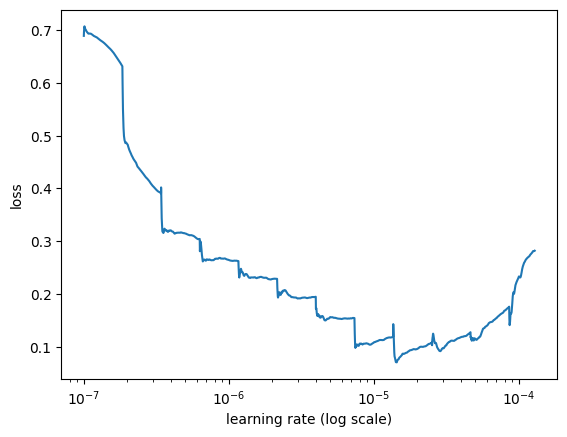

In [12]:
learner.lr_find(max_epochs=30)
learner.lr_plot()

In [8]:
learner.autofit(10e-6, epochs=12)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/12
3125/3125 [==============================] - 838s 264ms/step - loss: 0.3117 - accuracy: 0.8611 - val_loss: 0.2278 - val_accuracy: 0.9061
Epoch 2/12
3125/3125 [==============================] - 823s 263ms/step - loss: 0.1850 - accuracy: 0.9285 - val_loss: 0.2220 - val_accuracy: 0.9127
Epoch 3/12
3125/3125 [==============================] - 822s 263ms/step - loss: 0.1214 - accuracy: 0.9569 - val_loss: 0.2462 - val_accuracy: 0.9120
Epoch 4/12
3125/3125 [==============================] - 825s 264ms/step - loss: 0.0736 - accuracy: 0.9763 - val_loss: 0.2892 - val_accuracy: 0.9096
Epoch 5/12
3125/3125 [==============================] - 824s 264ms/step - loss: 0.0456 - accuracy: 0.9865 - val_loss: 0.3464 - val_accuracy: 0.9096
Epoch 6/12
3125/3125 [==============================] - 825s 264ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.3996 - val_accuracy: 0.9080
Epoch 7/12
3125/3125 [===========

In [9]:
predictor = ktrain.get_predictor(learner.model, preproc, batch_size=8)
predictor

In [11]:
dir(predictor)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_make_predictor_folder',
 '_save_model',
 '_save_preproc',
 'batch_size',
 'c',
 'create_onnx_session',
 'explain',
 'export_model_to_onnx',
 'export_model_to_tflite',
 'get_classes',
 'model',
 'predict',
 'predict_proba',
 'preproc',
 'save']

In [12]:
predictor.save('model/BERT_IMDB')

In [9]:
predictor_saved = ktrain.load_predictor('model/BERT_IMDB')

In [10]:
dir(predictor_saved)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_make_predictor_folder',
 '_save_model',
 '_save_preproc',
 'batch_size',
 'c',
 'create_onnx_session',
 'explain',
 'export_model_to_onnx',
 'export_model_to_tflite',
 'get_classes',
 'model',
 'predict',
 'predict_proba',
 'preproc',
 'save']

In [11]:
learner_saved = ktrain.get_learner(predictor_saved.model, (train_x, train_y), (test_x, test_y), batch_size=8)
learner_saved.view_top_losses(3, predictor_saved.preproc)

782/782 [==============================] - 177s 221ms/step
----------
id:15486 | loss:15.8 | true:negative | pred:positive)

[CLS] ' ernest saves christmas ' is comedian ernest ' s christmas special film . in this film , ernest has to find a successor to santa claus in order for christmas to continue . along the way , he meets a young girl who is a thief and who ends up stealing something very important of santa ' s ( i won ' t tell you what that is ; you ' ll just have to watch the film for yourself ) . like most ernest films , there is a lot of slap ##stick humor involved . < br / > < br / > this film is probably one of ernest ' s best films . it ' s funny , and it has some important lessons to learn regarding friendship and family and not being afraid to show love . it ' s not the best christmas film around , but it is a good one to get you in the christmas spirit . it ' s a little bit sad that the film is a little dated now . [SEP]
----------
id:12676 | loss:15.76 | true:negative |

In [12]:
top_loss_review = df_test.iloc[15486].review
top_loss_review

"'Ernest Saves Christmas' is comedian Ernest's Christmas special film. In this film, Ernest has to find a successor to Santa Claus in order for Christmas to continue. Along the way, he meets a young girl who is a thief and who ends up stealing something very important of Santa's (I won't tell you what that is; you'll just have to watch the film for yourself). Like most Ernest films, there is a lot of slapstick humor involved.<br /><br />This film is probably one of Ernest's best films. It's funny, and it has some important lessons to learn regarding friendship and family and not being afraid to show love. It's not the best Christmas film around, but it is a good one to get you in the Christmas spirit. It's a little bit sad that the film is a little dated now."

In [13]:
predictor_saved.explain(top_loss_review)

In [14]:
top_loss_review2 = df_test.iloc[12676].review
top_loss_review2

'The cast of "All That" returns for good humor in the "Good Burger" a place similar to an old fashioned fast food restaurant. The comedy is terrific, the fun is non-stop, and though cliché, is a passer for kid and family comedy.<br /><br />A movie for all ages, this movie is meant to enjoy, laugh, and pretty much a lazy movie for a rainy day, as that\'s what I\'d save this movie for, a rainy day. USA aired it today, and since I know that the cast of "All That" is in it, I thought that it might be a bit of a chuckle burner, but in good fun, as Keenan Thompson and Kel Mitchell (probably one of the best young duos of that time) were terrific together, the pieces came together, and everything worked out, and it made it into good family fun together with some lazy day work to get off the bad day.<br /><br />May I take your order?'

In [15]:
predictor_saved.explain(top_loss_review2)

In [16]:
top_loss_review3 = df_test.iloc[20311].review
top_loss_review3

'"Nacho Libre" (2006) <br /><br />Directed By: Jared Hess <br /><br />Starring: Jack Black, Ana de la Reguera, Héctor Jiménez, & Darius Rose <br /><br />MPAA Rating: "PG-13" (for some rough action, and crude humor including dialog) <br /><br />Say what you will about it (I know some people who despise it to no end), but I have always thought that "Napoleon Dynamite" was a funny movie--not the brightest brick on the wall, but a funny movie, nonetheless. Jack Black is also a very funny man--irritating at times, yes, and massively overrated by adolescent audiences who practically worship him, but funny. There has rarely been a Jack Black comedy that I did not enjoy to some degree. So, I was very happy to hear that Jared Hess, the writer and director of "Napoleon Dynamite", and Jack Black would be teaming up for a movie about a Spanish friar who becomes a wrestler to save an orphanage. My only reservation was that the plot seemed a little too thin. Unfortunately, my one reservation turned 

In [17]:
predictor_saved.explain(top_loss_review3)